# Homework 1 -- Data Wrangling using Pandas

<font color=red>Due date: 10/05/2021 6:30pm CDT</font>

+ <font color=red>Please append your name to this file name</font>, e.g., HW1_Xianjun_Geng.ipynb in my case, so that I can tell who submitted which file. 
+ Make sure you've run all code cells and all generated on-screen outputs are visible before you submit. This helps our grading process. <font color=red>Do NOT clear outputs before submission!</font>
+ Submit through Canvas.

In [2]:
import pandas as pd
import numpy as np
pd.set_option('max_columns',50)

For Questions 1 and 2, please use dataset 'partially_cleaned_survey.csv'. This dataset comes from a survey of graduate students about their various computer programming skills. Let's first load the dataset into DataFrame `df1`, and view the first few records:

In [3]:
df1 = pd.read_csv('partially_cleaned_survey.csv')
df1.head(3)

,Expert,BachTime,Program,ProgSkills,C,CPP,CS,Java,Python,JS,R,SQL,SAS,Excel,Classification,Clustering,Job,Languages
0,1,longer than 1 year ago but less than 3 years ago,MSIS,4,1,1,0.0,1,1.0,1.0,0.0,1.0,0.0,1,4,4,0.0,7.0
1,0,over 5 years ago,MSIS,3,1,1,0.0,1,0.0,0.0,0.0,1.0,0.0,1,2,2,0.5,5.0
2,0,longer than 3 years ago but less than 5 years ago,MSIS,3,0,0,0.0,1,1.0,0.0,0.0,1.0,0.0,1,3,3,0.0,4.0


## Question 1: Data transformation

Column `BachTime` is about the number of years since a student received her/his bachelor's degree. The answers are long strings. Please convert the values to shorter strings as follows:
+ '< 1 year ago' --> 'Bach_0to1'
+ 'longer than 1 year ago but less than 3 years ago' --> 'Bach_1to3'
+ 'longer than 3 years ago but less than 5 years ago' --> 'Bach_3to5'
+ 'over 5 years ago' --> 'Bach_5plus'

## Solution 1 -- boolean selection

(0.5 point) Use Solution 1 -- boolean selection -- in Part 2 of our data wrangling lecture to accomplish this task. Save the result in a new column 'BachTime1'.

In [4]:
# Add your code here. Feel free to add more code cells or markdown cells 
# as you see fit (and this advice applies to all later questions as well).
df1_1=df1.copy()

In [5]:
df1_1.loc[df1_1['BachTime']=='< 1 year ago','BachTime1']='Bach_0to1'
df1_1.loc[df1_1['BachTime']=='longer than 1 year ago but less than 3 years ago','BachTime1']='Bach_1to3'
df1_1.loc[df1_1['BachTime']=='longer than 3 years ago but less than 5 years ago' ,'BachTime1']='Bach_3to5'
df1_1.loc[df1_1['BachTime']=='over 5 years ago','BachTime1']='Bach_5plus'

In [6]:
df1_1.BachTime1.head(10)

0     Bach_1to3
1    Bach_5plus
2     Bach_3to5
3    Bach_5plus
4     Bach_3to5
5     Bach_1to3
6     Bach_1to3
7     Bach_0to1
8    Bach_5plus
9    Bach_5plus
Name: BachTime1, dtype: object

## Solution 2 -- Series.apply(function)

(0.25 point) Use Solution 2 -- `Series.apply(function)` -- in Part 2 of our data wrangling lecture to accomplish this task. Save the result in a new column 'BachTime2'.

In [7]:
df1_2=df1.copy()

In [8]:
def BT2(btstr):
    if btstr=='< 1 year ago':
        return 'Bach_0to1'
    elif btstr=='longer than 1 year ago but less than 3 years ago':
        return 'Bach_1to3'
    elif btstr=='longer than 3 years ago but less than 5 years ago':
        return 'Bach_3to5'
    elif btstr=='over 5 years ago':
        return 'Bach_5plus'
    else:
        return btstr

In [9]:
df1_2['BachTime2']=df1_2['BachTime'].apply(BT2)

In [10]:
df1_2.head(5)

,Expert,BachTime,Program,ProgSkills,C,CPP,CS,Java,Python,JS,R,SQL,SAS,Excel,Classification,Clustering,Job,Languages,BachTime2
0,1,longer than 1 year ago but less than 3 years ago,MSIS,4,1,1,0.0,1,1.0,1.0,0.0,1.0,0.0,1,4,4,0.0,7.0,Bach_1to3
1,0,over 5 years ago,MSIS,3,1,1,0.0,1,0.0,0.0,0.0,1.0,0.0,1,2,2,0.5,5.0,Bach_5plus
2,0,longer than 3 years ago but less than 5 years ago,MSIS,3,0,0,0.0,1,1.0,0.0,0.0,1.0,0.0,1,3,3,0.0,4.0,Bach_3to5
3,0,over 5 years ago,MSIS,3,1,0,0.0,1,1.0,0.0,1.0,1.0,0.0,1,2,3,0.0,6.0,Bach_5plus
4,0,longer than 3 years ago but less than 5 years ago,MSIS,3,1,0,0.0,1,1.0,0.0,0.0,1.0,0.0,1,1,1,0.0,5.0,Bach_3to5


## Solution 4 -- DataFrame.replace()

(0.25 point) Use Solution 4 -- `DataFrame.replace()` -- in Part 2 of our data wrangling lecture to accomplish this task. Save the result in a new column 'BachTime3'.

In [11]:
df1_4=df1.copy()

In [1]:
6/9

0.6666666666666666

In [12]:
BT_map={'< 1 year ago':'Bach_0to1'
        ,'longer than 1 year ago but less than 3 years ago':'Bach_1to3'
        ,'longer than 3 years ago but less than 5 years ago':'Bach_3to5'
        ,'over 5 years ago':'Bach_5plus'}

In [13]:
df1_4['BachTime3']=df1_4.replace(BT_map)['BachTime']

In [14]:
df1_4.head(5)

,Expert,BachTime,Program,ProgSkills,C,CPP,CS,Java,Python,JS,R,SQL,SAS,Excel,Classification,Clustering,Job,Languages,BachTime3
0,1,longer than 1 year ago but less than 3 years ago,MSIS,4,1,1,0.0,1,1.0,1.0,0.0,1.0,0.0,1,4,4,0.0,7.0,Bach_1to3
1,0,over 5 years ago,MSIS,3,1,1,0.0,1,0.0,0.0,0.0,1.0,0.0,1,2,2,0.5,5.0,Bach_5plus
2,0,longer than 3 years ago but less than 5 years ago,MSIS,3,0,0,0.0,1,1.0,0.0,0.0,1.0,0.0,1,3,3,0.0,4.0,Bach_3to5
3,0,over 5 years ago,MSIS,3,1,0,0.0,1,1.0,0.0,1.0,1.0,0.0,1,2,3,0.0,6.0,Bach_5plus
4,0,longer than 3 years ago but less than 5 years ago,MSIS,3,1,0,0.0,1,1.0,0.0,0.0,1.0,0.0,1,1,1,0.0,5.0,Bach_3to5


## Question 2: groupby

The topic of `DataFrame.groupby()` was covered in your datacamp.com assignment 2. Alternatively, you can also review the summary file "PandasDataFrame_filled.ipynb" that I prepared (see file folder 03b_PandasDataFrame in our Canvas course) to refresh your knowledge if needed. `groupby` is covered at the end of this summary file. 

(0.25 point) For each program, how many people know R? 

In [15]:
df1.groupby('Program')['R'].sum()

Program
Business Man                     1.0
Faculty!                         0.0
MBA                              7.0
MSIS                             4.0
Master of Finance                0.0
Supply Chain Mgmt & Analytics    0.0
Name: R, dtype: float64

(0.25 point) For each program, how many people have a Programming Skill knowledge of less than 4? Report one row for each existing program. 

In [16]:
df1[df1['ProgSkills']<4].groupby('Program')['Program'].size()

Program
Business Man                      1
Faculty!                          1
MBA                              13
MSIS                             30
Supply Chain Mgmt & Analytics     2
Name: Program, dtype: int64

(0.5 point) Among people who know Java, what percentage of them know SQL, and what percentage of them know Excel? What about among people who does not know Java?

In [17]:
java_sql_prop=df1[df1['Java']==1]['SQL'].mean()
java_excel_prop=df1[df1['Java']==1]['Excel'].mean()

nojava_sql_prop=df1[df1['Java']==0]['SQL'].mean()
nojava_excel_prop=df1[df1['Java']==0]['Excel'].mean()

In [18]:
java_sql_prop

0.9545454545454546

In [19]:
java_excel_prop

0.9333333333333333

In [20]:
nojava_sql_prop

0.5625

In [21]:
nojava_excel_prop

1.0

## Question 3: Data wrangling on the LendingClub dataset

This question uses dataset "LendingClub.csv". Please start by loading this dataset into DataFrame `lc` (first character is letter l, not number 1). Then, print on screen the first 5 records.
+ No point earned for this step. You simply cannot proceed further if this step is not finished.

In [22]:
import pandas as pd
lc=pd.read_csv('LendingClub.csv')
lc.head(5)

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


##### For the rest of this question, please do the following data wrangling tasks. 

(1 point) This dataset contains columns of varying data scales. For example, values in columns `revol_bal` and `int_rate` differ by several orders of magnitude. We decide to rescale some data columns as follows:
+ create a new column `installment_K` which equals to column `installment` divided by 1000
+ create a new column `fico_ratio` which equals to column `fico` divided by 850
+ create a new column `decades_with_cr_line` which equals to column `days_with_cr_line` divided by 3650
+ create a new column `log_revol_bal` which equals to `np.log(lc.revol_bal + 1)`

Please write code to create the above four new columns. Afterwards, please drop columns `installment`, `fico`, `days_with_cr_line` and `revol_bal` from the dataset.
+ Note: In general, it's always a good idea to print on screen after every step of modification, so you can make sure your code did what you intended.

In [23]:
lc['installment_K']=lc['installment']/1000
lc['fico_ratio']=lc['fico']/850
lc['decades_with_cr_line']=lc['days_with_cr_line']/3650
lc['log_revol_bal']=np.log(lc.revol_bal + 1)

In [24]:
lc.iloc[:5, -4:]

,installment_K,fico_ratio,decades_with_cr_line,log_revol_bal
0,0.82910,0.867059,1.545194,10.270039
1,0.22822,0.831765,0.756164,10.422995
2,0.36686,0.802353,1.290411,8.163941
3,0.16234,0.837647,0.739715,10.424303
4,0.10292,0.784706,1.113973,8.464003


(0.5 point) Next, please create dummies from column `purpose`, drop the most frequent dummy (for this, you'll need to first find out which value of `purpose` appears most frquently), and then drop `purpose`.

In [25]:
lc_new=pd.get_dummies(lc,columns=['purpose'])
lc_new.iloc[:, -7:].sum()

purpose_all_other             2331
purpose_credit_card           1262
purpose_debt_consolidation    3957
purpose_educational            343
purpose_home_improvement       629
purpose_major_purchase         437
purpose_small_business         619
dtype: int64

In [26]:
lc_new.drop(columns='purpose_debt_consolidation',inplace=True)
lc_new.head(10)

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid,installment_K,fico_ratio,decades_with_cr_line,log_revol_bal,purpose_all_other,purpose_credit_card,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0.82910,0.867059,1.545194,10.270039,0,0,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0.22822,0.831765,0.756164,10.422995,0,1,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0.36686,0.802353,1.290411,8.163941,0,0,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0.16234,0.837647,0.739715,10.424303,0,0,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0.10292,0.784706,1.113973,8.464003,0,1,0,0,0,0
5,1,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0,0.12513,0.855294,1.676724,10.835809,0,1,0,0,0,0
6,1,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1,0.19402,0.784706,0.871244,8.253228,0,0,0,0,0,0
7,1,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1,0.13122,0.849412,1.401644,10.094975,1,0,0,0,0,0
8,1,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0,0.08719,0.802353,1.092877,11.154964,0,0,0,1,0,0
9,1,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0,0.08412,0.831765,0.747957,8.636042,0,0,0,0,0,0


## Question 4: Data wrangling on the KDD98 dataset

This question uses dataset "KDD98.csv". We have already tried some data wrangling on this dataset in class. In this question, you will do a more thorough data wrangling over this dataset.

Please start by loading this dataset into DataFrame `kd`. Then, print on screen the first 5 records.
+ No point earned for this step. You simply cannot proceed further if this step is not finished.

In [27]:
kd=pd.read_csv('KDD98.csv')

In [28]:
kd.head(5)

,ID,TargetB,TargetD,DemCluster,DemAge,DemGender,DemHomeOwner,DemMedHomeValue,DemMedIncome,DemPctVeterans,GiftCnt36,GiftCntAll,GiftCntCard36,GiftCntCardAll,GiftAvg36,GiftAvgAll,GiftAvgCard36,GiftAvgLast,GiftTimeFirst,GiftTimeLast,PromCnt12,PromCnt36,PromCntAll,PromCntCard12,PromCntCard36,PromCntCardAll,StatusCat96NK,StatusCatStarAll
0,14974,0,NaN,0,NaN,F,U,0,0,0,2,4,1,3,13.50,9.25,17.00,17.0,66,21,8,17,26,3,8,13,A,0
1,6294,0,NaN,23,67.0,F,U,186800,0,85,1,8,0,3,20.00,15.88,NaN,20.0,92,26,14,35,79,5,5,24,A,0
2,46110,1,4.0,0,NaN,M,U,87600,38750,36,6,41,3,20,5.17,3.73,5.00,6.0,111,18,12,23,51,5,11,22,S,1
3,185937,1,10.0,0,NaN,M,U,139200,38942,27,3,12,3,8,8.67,8.50,8.67,10.0,93,9,14,22,44,2,6,16,E,1
4,29637,0,NaN,35,53.0,M,U,168100,71509,37,1,1,1,1,20.00,20.00,20.00,20.0,21,21,10,15,13,4,7,6,F,0


For the rest of this question, please do the following data wrangling tasks. 

(0.25 point) Remove columns `ID`, `TargetD`, and `DemCluster`. Print on the screen the first 5 records of `kd` to double check that this operation is successful.

In [29]:
kd1=kd.copy()

In [30]:
kd1.drop(columns=['ID','TargetD','DemCluster'],inplace=True)

In [31]:
kd1.head(5)

,TargetB,DemAge,DemGender,DemHomeOwner,DemMedHomeValue,DemMedIncome,DemPctVeterans,GiftCnt36,GiftCntAll,GiftCntCard36,GiftCntCardAll,GiftAvg36,GiftAvgAll,GiftAvgCard36,GiftAvgLast,GiftTimeFirst,GiftTimeLast,PromCnt12,PromCnt36,PromCntAll,PromCntCard12,PromCntCard36,PromCntCardAll,StatusCat96NK,StatusCatStarAll
0,0,NaN,F,U,0,0,0,2,4,1,3,13.50,9.25,17.00,17.0,66,21,8,17,26,3,8,13,A,0
1,0,67.0,F,U,186800,0,85,1,8,0,3,20.00,15.88,NaN,20.0,92,26,14,35,79,5,5,24,A,0
2,1,NaN,M,U,87600,38750,36,6,41,3,20,5.17,3.73,5.00,6.0,111,18,12,23,51,5,11,22,S,1
3,1,NaN,M,U,139200,38942,27,3,12,3,8,8.67,8.50,8.67,10.0,93,9,14,22,44,2,6,16,E,1
4,0,53.0,M,U,168100,71509,37,1,1,1,1,20.00,20.00,20.00,20.0,21,21,10,15,13,4,7,6,F,0


(0.25 point) As we found in class, column `DemMedIncome` is problematic as it contains too many values of zero. Suppose that we learned these zero incomes actually mean these potential donors refused to provide their income information. Accordingly, please write code to convert these zero values in column `DemMedIncome` to missing value. 
+ Note: Don't change any non-zero values in this column, and don't accidently touch any values in any other columns.

In [32]:
kd1['DemMedIncome'].replace(0,np.nan)

0           NaN
1           NaN
2       38750.0
3       38942.0
4       71509.0
         ...   
9681    45909.0
9682    50530.0
9683        NaN
9684    62717.0
9685    59813.0
Name: DemMedIncome, Length: 9686, dtype: float64

(0.25 point) Print out the mean and skewness of all numerical columns.
+ Note: you do not need to first identify which columns are numerical. By default, pandas will automatically omit non-numerical columns when calculating the above statistics.

In [33]:
kd.mean()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


ID                   97975.474086
TargetB                  0.500000
TargetD                 15.624344
DemCluster              27.150320
DemAge                  59.150845
DemMedHomeValue     110986.299814
DemMedIncome         40491.444249
DemPctVeterans          30.604274
GiftCnt36                3.205451
GiftCntAll              10.507640
GiftCntCard36            1.856597
GiftCntCardAll           5.582490
GiftAvg36               14.876203
GiftAvgAll              12.489325
GiftAvgCard36           14.224431
GiftAvgLast             16.017739
GiftTimeFirst           71.100351
GiftTimeLast            18.002168
PromCnt12               12.988850
PromCnt36               29.348235
PromCntAll              48.483481
PromCntCard12            5.392009
PromCntCard36           11.954677
PromCntCardAll          19.007124
StatusCatStarAll         0.540574
dtype: float64

In [34]:
kd.skew()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


ID                  -0.057613
TargetB              0.000000
TargetD              5.169490
DemCluster          -0.086715
DemAge              -0.387912
DemMedHomeValue      2.378211
DemMedIncome         0.310025
DemPctVeterans      -0.207059
GiftCnt36            1.288353
GiftCntAll           1.863109
GiftCntCard36        1.172452
GiftCntCardAll       1.331353
GiftAvg36            5.627792
GiftAvgAll          14.486489
GiftAvgCard36        6.051455
GiftAvgLast          9.918893
GiftTimeFirst        0.195399
GiftTimeLast        -0.778047
PromCnt12            2.873723
PromCnt36            0.261958
PromCntAll           0.460765
PromCntCard12        0.684994
PromCntCard36       -0.426600
PromCntCardAll       0.142856
StatusCatStarAll    -0.162858
dtype: float64

(0.25 point) This KDD98 dataset has some data scale issues (i.e., some columns are much larger than others on average). Please identify one column that you would like to rescale using either normalization or standardization. And then rescale it as you see fit. Add this newly created column to the dataset and accordingly remove the old one.
+ This is an open question, there's no standard answer on which column to choose. But it needs to be reasonable -- feel free to write concise explanation if you want use markdown cell.

## Sol1: Z-score normalization

 The 'DemMedHomeValue' are much larger than others. So I rescale this column with standardization.

The result of standardization (or Z-score normalization) is that the features will be rescaled to ensure the mean and the standard deviation to be 0 and 1, respectively

In [73]:
kd2_1=kd.copy()

In [74]:
#Import library
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_X = sc_X.fit_transform(kd2_1.loc[:,['DemMedHomeValue']])
# #Convert to table format - StandardScaler 
sc_X = pd.DataFrame(data=sc_X, columns=["DemMedHomeValue"])
sc_X

,DemMedHomeValue
0,-1.124871
1,0.768389
2,-0.237025
3,0.285952
4,0.578860
...,...
9681,-0.433649
9682,-0.396149
9683,0.047774
9684,-0.047497


In [75]:
kd2_1['DemMedHomeValue']=sc_X['DemMedHomeValue']
kd2_1.head(5)

,ID,TargetB,TargetD,DemCluster,DemAge,DemGender,DemHomeOwner,DemMedHomeValue,DemMedIncome,DemPctVeterans,GiftCnt36,GiftCntAll,GiftCntCard36,GiftCntCardAll,GiftAvg36,GiftAvgAll,GiftAvgCard36,GiftAvgLast,GiftTimeFirst,GiftTimeLast,PromCnt12,PromCnt36,PromCntAll,PromCntCard12,PromCntCard36,PromCntCardAll,StatusCat96NK,StatusCatStarAll
0,14974,0,NaN,0,NaN,F,U,-1.124871,0,0,2,4,1,3,13.50,9.25,17.00,17.0,66,21,8,17,26,3,8,13,A,0
1,6294,0,NaN,23,67.0,F,U,0.768389,0,85,1,8,0,3,20.00,15.88,NaN,20.0,92,26,14,35,79,5,5,24,A,0
2,46110,1,4.0,0,NaN,M,U,-0.237025,38750,36,6,41,3,20,5.17,3.73,5.00,6.0,111,18,12,23,51,5,11,22,S,1
3,185937,1,10.0,0,NaN,M,U,0.285952,38942,27,3,12,3,8,8.67,8.50,8.67,10.0,93,9,14,22,44,2,6,16,E,1
4,29637,0,NaN,35,53.0,M,U,0.578860,71509,37,1,1,1,1,20.00,20.00,20.00,20.0,21,21,10,15,13,4,7,6,F,0


## Sol2: Max-Min Normalization with MinMacScaler

 An alternative is to use Max-Min Normalization  
This technique is to re-scales features with a distribution value between 0 and 1. For every feature, the minimum value of that feature gets transformed into 0, and the maximum value gets transformed into 1. 

In [76]:
kd2_2=kd.copy()

In [77]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(kd2_2.loc[:,['DemMedHomeValue']])
scaled_features = scaler.transform(kd2_2.loc[:,['DemMedHomeValue']])
#Convert to table format - MinMaxScaler
df_MinMax = pd.DataFrame(data=scaled_features, columns=['DemMedHomeValue'])
df_MinMax

,DemMedHomeValue
0,0.000000
1,0.311333
2,0.146000
3,0.232000
4,0.280167
...,...
9681,0.113667
9682,0.119833
9683,0.192833
9684,0.177167


In [78]:
kd2_2['DemMedHomeValue']=df_MinMax['DemMedHomeValue']
kd2_2.head(5)

,ID,TargetB,TargetD,DemCluster,DemAge,DemGender,DemHomeOwner,DemMedHomeValue,DemMedIncome,DemPctVeterans,GiftCnt36,GiftCntAll,GiftCntCard36,GiftCntCardAll,GiftAvg36,GiftAvgAll,GiftAvgCard36,GiftAvgLast,GiftTimeFirst,GiftTimeLast,PromCnt12,PromCnt36,PromCntAll,PromCntCard12,PromCntCard36,PromCntCardAll,StatusCat96NK,StatusCatStarAll
0,14974,0,NaN,0,NaN,F,U,0.000000,0,0,2,4,1,3,13.50,9.25,17.00,17.0,66,21,8,17,26,3,8,13,A,0
1,6294,0,NaN,23,67.0,F,U,0.311333,0,85,1,8,0,3,20.00,15.88,NaN,20.0,92,26,14,35,79,5,5,24,A,0
2,46110,1,4.0,0,NaN,M,U,0.146000,38750,36,6,41,3,20,5.17,3.73,5.00,6.0,111,18,12,23,51,5,11,22,S,1
3,185937,1,10.0,0,NaN,M,U,0.232000,38942,27,3,12,3,8,8.67,8.50,8.67,10.0,93,9,14,22,44,2,6,16,E,1
4,29637,0,NaN,35,53.0,M,U,0.280167,71509,37,1,1,1,1,20.00,20.00,20.00,20.0,21,21,10,15,13,4,7,6,F,0


## Sol3: Max-Min Normalization with Function

In [79]:
kd2_3=kd2.copy()

In [80]:
def MaxMinNormalization(x):
    Max=max(x)
    Min=min(x)
    x = (x - Min) / (Max - Min)
    return x

In [81]:
kd2_3['DemMedHomeValue']=MaxMinNormalization(kd2_3['DemMedHomeValue'])

In [82]:
kd2_3.head(5)

,ID,TargetB,TargetD,DemCluster,DemAge,DemGender,DemHomeOwner,DemMedHomeValue,DemMedIncome,DemPctVeterans,GiftCnt36,GiftCntAll,GiftCntCard36,GiftCntCardAll,GiftAvg36,GiftAvgAll,GiftAvgCard36,GiftAvgLast,GiftTimeFirst,GiftTimeLast,PromCnt12,PromCnt36,PromCntAll,PromCntCard12,PromCntCard36,PromCntCardAll,StatusCat96NK,StatusCatStarAll
0,14974,0,NaN,0,NaN,F,U,0.000000,0,0,2,4,1,3,13.50,9.25,17.00,17.0,66,21,8,17,26,3,8,13,A,0
1,6294,0,NaN,23,67.0,F,U,0.311333,0,85,1,8,0,3,20.00,15.88,NaN,20.0,92,26,14,35,79,5,5,24,A,0
2,46110,1,4.0,0,NaN,M,U,0.146000,38750,36,6,41,3,20,5.17,3.73,5.00,6.0,111,18,12,23,51,5,11,22,S,1
3,185937,1,10.0,0,NaN,M,U,0.232000,38942,27,3,12,3,8,8.67,8.50,8.67,10.0,93,9,14,22,44,2,6,16,E,1
4,29637,0,NaN,35,53.0,M,U,0.280167,71509,37,1,1,1,1,20.00,20.00,20.00,20.0,21,21,10,15,13,4,7,6,F,0


(0.25 point) Similarly, please identify one column that has skewness issue. Visualize this column (and this column only) using a histogram, do a log transformation, then visualize the transformed column.
+ Hint: If you run into error when using `np.log()` function, check earlier in this homework how we did log transformation of the `revol_bal` column in the LendingClub dataset.

In [39]:
import matplotlib.pyplot as plt

In [40]:
kd.skew()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


ID                  -0.057613
TargetB              0.000000
TargetD              5.169490
DemCluster          -0.086715
DemAge              -0.387912
DemMedHomeValue      2.378211
DemMedIncome         0.310025
DemPctVeterans      -0.207059
GiftCnt36            1.288353
GiftCntAll           1.863109
GiftCntCard36        1.172452
GiftCntCardAll       1.331353
GiftAvg36            5.627792
GiftAvgAll          14.486489
GiftAvgCard36        6.051455
GiftAvgLast          9.918893
GiftTimeFirst        0.195399
GiftTimeLast        -0.778047
PromCnt12            2.873723
PromCnt36            0.261958
PromCntAll           0.460765
PromCntCard12        0.684994
PromCntCard36       -0.426600
PromCntCardAll       0.142856
StatusCatStarAll    -0.162858
dtype: float64

#### The 'GiftAvgAll' column has high skewness

<AxesSubplot:>

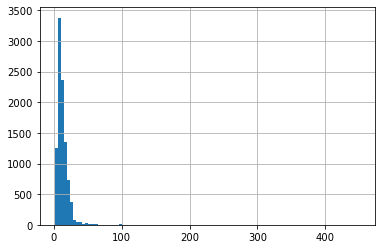

In [93]:
kd['GiftAvgAll'].hist(bins=100)

<AxesSubplot:>

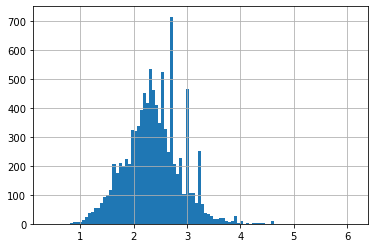

In [94]:
kd3=kd.copy()
kd3['GiftAvgAll']=np.log(kd3['GiftAvgAll'])
kd3['GiftAvgAll'].hist(bins=100)

In [95]:
kd3['GiftAvgAll']

0       2.224624
1       2.765060
2       1.316408
3       2.140066
4       2.995732
          ...   
9681    2.708050
9682    2.442347
9683    2.042518
9684    2.005526
9685    1.510722
Name: GiftAvgAll, Length: 9686, dtype: float64

(0.25 point) The nonprofit organization is especially interested in studying motivated young donors. Please create a new column where the value is 1 only if the donor is 30 years old or younger AND has donated at least 5 times in the past. Name this new column `FocalYoung`.

In [96]:
kd4=kd.copy()

In [97]:
kd4['FocalYoug']=kd4.apply(lambda x : 1 if x.DemAge <= 30 and x.GiftCntAll>=5 else 0, axis=1)

In [98]:
kd4.loc[:,['FocalYoug']]

,FocalYoug
0,0
1,0
2,0
3,0
4,0
...,...
9681,0
9682,0
9683,0
9684,0


In [99]:
kd4.head(100)

,ID,TargetB,TargetD,DemCluster,DemAge,DemGender,DemHomeOwner,DemMedHomeValue,DemMedIncome,DemPctVeterans,GiftCnt36,GiftCntAll,GiftCntCard36,GiftCntCardAll,GiftAvg36,GiftAvgAll,GiftAvgCard36,GiftAvgLast,GiftTimeFirst,GiftTimeLast,PromCnt12,PromCnt36,PromCntAll,PromCntCard12,PromCntCard36,PromCntCardAll,StatusCat96NK,StatusCatStarAll,FocalYoug
0,14974,0,NaN,0,NaN,F,U,0,0,0,2,4,1,3,13.50,9.25,17.00,17.0,66,21,8,17,26,3,8,13,A,0,0
1,6294,0,NaN,23,67.0,F,U,186800,0,85,1,8,0,3,20.00,15.88,NaN,20.0,92,26,14,35,79,5,5,24,A,0,0
2,46110,1,4.0,0,NaN,M,U,87600,38750,36,6,41,3,20,5.17,3.73,5.00,6.0,111,18,12,23,51,5,11,22,S,1,0
3,185937,1,10.0,0,NaN,M,U,139200,38942,27,3,12,3,8,8.67,8.50,8.67,10.0,93,9,14,22,44,2,6,16,E,1,0
4,29637,0,NaN,35,53.0,M,U,168100,71509,37,1,1,1,1,20.00,20.00,20.00,20.0,21,21,10,15,13,4,7,6,F,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,188284,1,5.0,22,59.0,F,H,298900,53517,28,3,20,1,10,5.67,5.10,5.00,10.0,121,6,19,37,79,7,14,29,S,1,0
96,15648,1,20.0,28,NaN,F,H,249000,73547,22,3,22,2,14,14.67,8.95,15.50,16.0,130,22,13,35,73,6,17,33,A,1,0
97,15720,0,NaN,44,29.0,F,H,126400,73547,36,3,5,2,4,13.33,10.00,12.50,15.0,45,26,10,29,37,5,15,15,A,1,1
98,16532,0,NaN,24,54.0,M,H,121400,73547,24,1,2,1,1,3.00,9.00,3.00,15.0,30,25,11,23,22,4,9,8,A,0,0


<font color=red>Once done, submit this ipynb file through Canvas under Homework 1. Again, remember to add your name to this file name</font>, e.g., HW1_Xianjun_Geng.ipynb in my case, so that I can tell who submitted which file. 
+ <font color=red>And do NOT clear outputs before submission!</font> So that I can observe both your code and your on-screen output.